<a href="https://colab.research.google.com/github/AshutoshAgrahari/GoogleColab/blob/master/Happy%26Sad_Expression_Classifier_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Happy&Sad Expression Classifier using TensorFlow

We will be training the Tensorflow network to recognise the happy and sad facial expression. 

In [63]:
# loading the libraries
import tensorflow as tf
import os  # for access the file from the local system
import zipfile  # for zipping or unzipping the file

# Setting the accuracy to 0.999
DESIRED_ACCURACY = 0.999

# fetching the dataset through google api
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"


# extracting image files from the zipped file.
zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip","r")
zip_ref.extractall("tmp/h-or-s")
zip_ref.close()


# Callback function to stop the epochs 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.999):
      print("\nReached 99.9% accuracy, so cancelling training!")
      self.model.stop_training = True

# Creating object of myCallback class to call the function
callbacks = myCallback()

--2019-04-14 08:31:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-04-14 08:31:33 (151 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



Processing the dataset:

In [64]:
# Directory with training happy dataset
train_happy_dir = os.path.join("/content/tmp/h-or-s/happy")

# Directory with training happy dataset
train_sad_dir = os.path.join("/content/tmp/h-or-s/sad")

# Now, let's see what the filenames look like in the happy and sad training directories:
train_happy_names = os.listdir(train_happy_dir)
train_sad_names = os.listdir(train_sad_dir)

print(train_happy_names[:10])
print(train_sad_names[:10])

# Let's find the total number of happy and sad images in the directory:
print("total happy images: ", len(os.listdir(train_happy_dir)))
print("total sad images: ", len(os.listdir(train_sad_dir)))


['happy1-09.png', 'happy2-16.png', 'happy1-14.png', 'happy2-09.png', 'happy2-11.png', 'happy1-05.png', 'happy1-07.png', 'happy2-01.png', 'happy1-15.png', 'happy1-06.png']
['sad2-02.png', 'sad2-19.png', 'sad1-18.png', 'sad1-11.png', 'sad2-00.png', 'sad1-14.png', 'sad1-03.png', 'sad2-16.png', 'sad2-07.png', 'sad2-12.png']
total happy images:  40
total sad images:  40


In [0]:
# Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameter for our graph, we'll output images in 4x4 configurations
nrows = 4
ncols = 4

# index for iterating over images
pic_index = 0

<function matplotlib.pyplot.show>

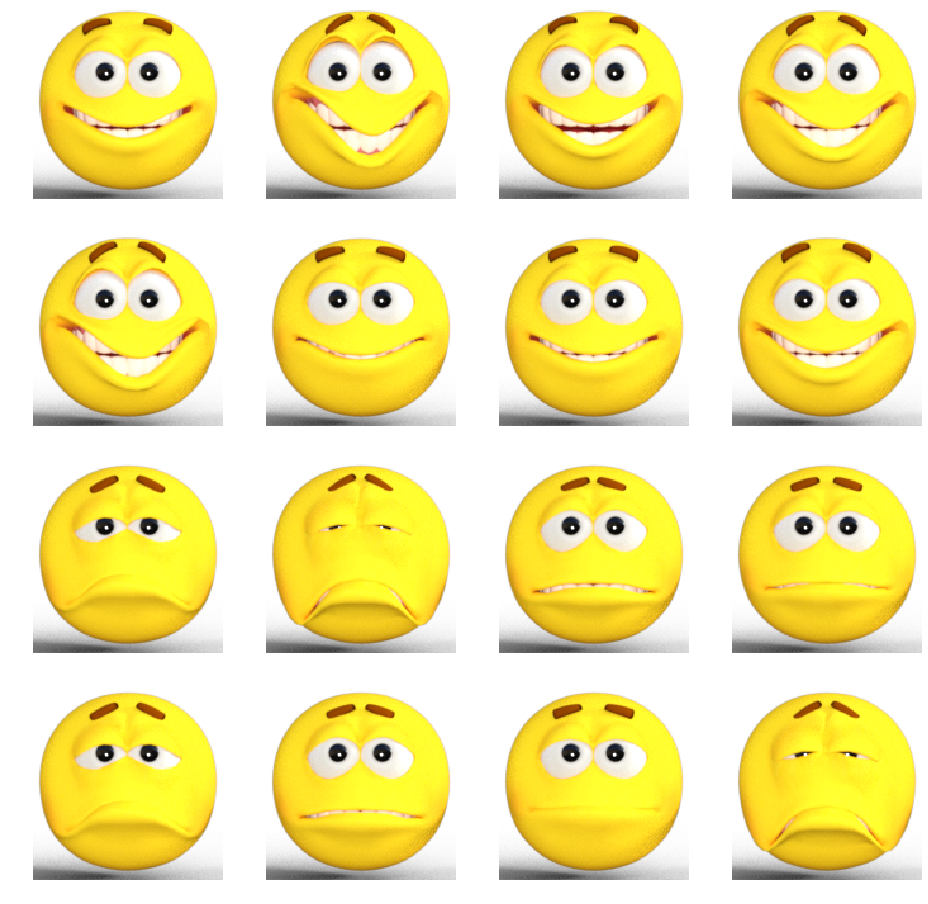

In [66]:
# Now, display a batch of 4 happy and 4 sad pictures. You can rerun the cell to see a fresh batch each time:

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows *4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname)
                 for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname)
               for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  #set up the subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') 
  
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show
    

In [67]:
"""
import numpy as np

# getting the shape of the images
np.shape(mpimg.imread(os.path.join(train_happy_dir,train_happy_names[10])))

"""
# Now, defining teh model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])

model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)             0         
__________

In [68]:
# This code block will create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all image will be rescaled to 1/255
train_datagen = ImageDataGenerator(rescale=1/255)


# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'tmp/h-or-s/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=8,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 80 images belonging to 2 classes.


In [69]:
# This code block will call model.fit_generator and train for a number of epochs. 
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = 8, 
    epochs = 15, 
    verbose = 1,callbacks = [callbacks])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
10/10 [==============================] - 3s 313ms/step - loss: 1.1387 - acc: 0.5875
Epoch 2/15
10/10 [==============================] - 3s 306ms/step - loss: 0.2761 - acc: 0.9125
Epoch 3/15
10/10 [==============================] - 3s 307ms/step - loss: 0.1131 - acc: 0.9625
Epoch 4/15
 9/10 [==========================>...] - ETA: 0s - loss: 0.0432 - acc: 1.0000
Reached 99.9% accuracy, so cancelling training!
10/10 [==============================] - 3s 305ms/step - loss: 0.0405 - acc: 1.0000


###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a happy or a sad.

In [75]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  
  # predicting images
  path = '/content/'+fn
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a sad.")
  else:
    print(fn + " is a happy")

Saving smile-98458_640.png to smile-98458_640 (1).png
[1.]
smile-98458_640.png is a sad.


In [0]:
# Cleanup

import os, signal
os.kill(os.getpid(), signal.SIGKILL)